# Загрузка и визуализация данных

Загрузим исходный набор испытаний (выборку) двух случайных величин $X$ и $Y$. Пара значений $(x_i, y_i)$ соовтетствуют измерениям двух случайных величин в $i$-ом испытании. Запишем значения в массивы `X` и `Y`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ordevoir-dark")

location = 'https://raw.githubusercontent.com/ordevoir/Miscellaneous/master/datasets/correlated_data.csv' 
data = np.genfromtxt(location, delimiter=',', dtype=np.float64, 
                     encoding='utf-8', skip_header=1)

X, Y = data[:, 0], data[:, 1]

print(f"  X\t\t  Y")
for i in range(5):
    print(f"{X[i]}\t\t{Y[i]}")

  X		  Y
1270.35		1026.08
697.87		375.4
1226.37		1147.14
1190.16		1006.19
1123.62		957.73


Для того, чтобы визуально оценить наличие корреляции между $X$ и $Y$, изобразим на диаграмме точки $(x_i, y_i)$:

Text(0, 0.5, 'Y')

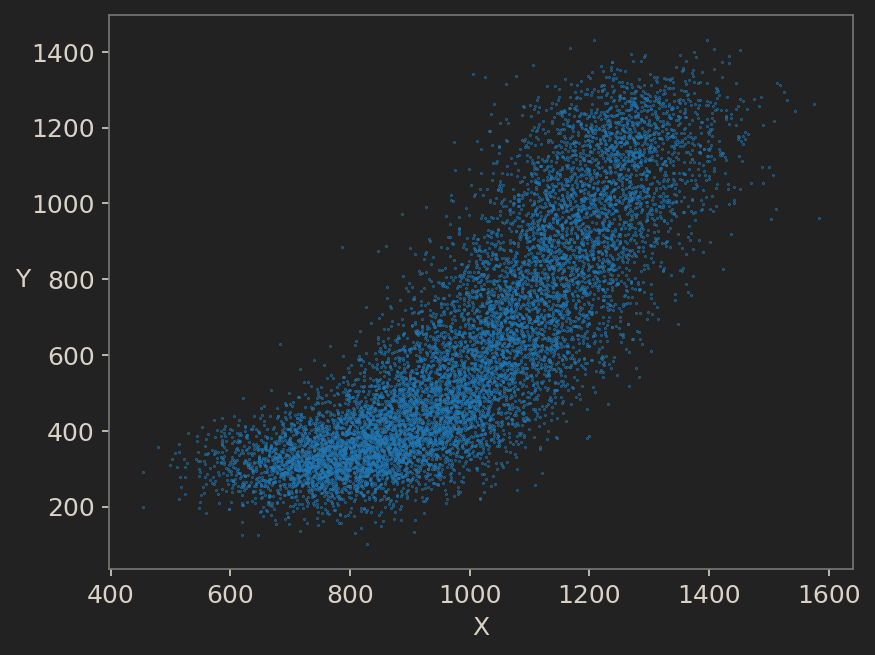

In [4]:
plt.scatter(X, Y, s=0.1)
plt.xlabel("X")
plt.ylabel("Y", rotation=0)

На диаграмме можно заметить, что между случайными величинами $X$ и $Y$ наблюдается некоторая зависимость: бóльшим значениями из $X$ преимущественно соответствуют бóльшие значения из $Y$.

# Вычисление ковариации

In [5]:
def cov(X, Y):
    return np.sum((X - X.mean()) * (Y - Y.mean())) / len(X)

print(f"{cov(X, Y) = :.2f}     ковариация между X и Y ")
print(f"{cov(Y, X) = :.2f}     ковариация между Y и X ")

cov(X, Y) = 50044.65     ковариация между X и Y 
cov(Y, X) = 50044.65     ковариация между Y и X 


>Заметим, что $\mathrm{cov}(X,Y) = \mathrm{cov}(Y, X)$.

Получить значение ковариации между двумя двумя случайными величинами можно при помощи функции `cov()` из библиотеки NumPy.

In [85]:
np.cov(X, Y)            # ковариационная матрица

array([[38203.41318045, 50049.65760421],
       [50049.65760421, 92493.90251806]])

In [86]:
np.var(X), np.var(Y)    # дисперсии

(38199.592839127996, 92484.65312781277)

# Вычисление корреляции

По абсолютному значению ковариации нельзя судить о том, насколько сильно величины взаимосвязаны, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений случайных величин. Полученная величина называется **коэффициентом корреляции Пирсона** (*Pearson Correlation Coefficient* (PCC))
$$ \mathbf r_{XY} = \frac {\sigma_{XY}}{\sigma_X \sigma_Y} $$
Коэффициент корреляции находится в интервале от $-1$ до $1$. Две случайные величины коррелируют, если $\sigma_{XY}$ или $\mathbf r_{XY}$ отличны от нуля. При $\mathbf r_{XY} > 0$ имеет место положительная корреляция, а при $\mathbf r_{XY} < 0$ – отрицательная корреляция.

In [91]:
def r(X, Y):
    return cov(X, Y) / (np.std(X) * np.std(Y))

print(f"{r(X, Y) = }")
print(f"{r(Y, X) = }")
print(f"{r(X, X) = }")
print(f"{r(Y, Y) = }")

r(X, Y) = 0.8419639098282211
r(Y, X) = 0.8419639098282211
r(X, X) = 1.0
r(Y, Y) = 1.0000000000000002


Получить значение коэффициента корреляции Пирсона между двумя двумя случайными величинами можно при помощи функции `corrcoef()` из библиотеки NumPy.

In [ ]:
np.corrcoef(X, Y)   # корреляционная матрица

array([[1.        , 0.84196391],
       [0.84196391, 1.        ]])

# Генерация коррелирующи данных

In [41]:
import numpy as np
from sklearn import utils

sample_size = 10000

X, Y = np.empty(sample_size), np.empty(sample_size)
# зададим значения X и Y функциями (с шумом):
for i in range(sample_size):
    x = i / 100
    X[i] = 6 * x  + 700 + np.random.normal(scale=90)
    Y[i] = 0.1 * (x**2) + 300 + np.random.normal(scale=60)

X, Y = utils.shuffle(X, Y)

print(f"X \t\t Y")
for i in range(10):
    print(f"{X[i]:.4f} \t {Y[i]:.4f}")

X 		 Y
1270.3542 	 1026.0827
697.8722 	 375.4046
1226.3743 	 1147.1385
1190.1552 	 1006.1862
1123.6182 	 957.7274
962.5028 	 451.7731
854.7979 	 325.4902
861.6859 	 451.9642
923.9617 	 353.2993
845.4923 	 427.6862


Сохраним данные в формате csv

In [52]:
data = np.hstack((X.reshape(-1, 1), Y.reshape(-1, 1)))

np.savetxt('correlated_data.csv', data, delimiter=',',
            header='X, Y', comments='', fmt='%.2f')

[[1270.35 1026.08]
 [ 697.87  375.4 ]
 [1226.37 1147.14]]
